<a href="https://colab.research.google.com/github/luizrenault/tp547/blob/main/trabalho_final_parte_1/hmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

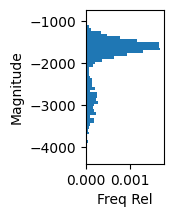

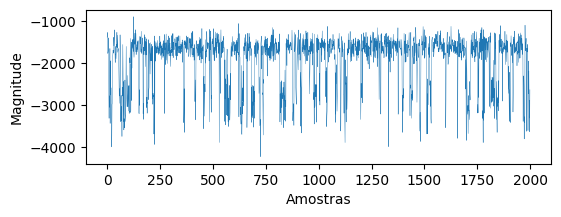

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def transicao(distribuicao):
    acumulada = np.cumsum(distribuicao)
    r = np.random.uniform(0, 1)
    return np.argmax(acumulada > r)

def potencia(estado, mu, sigma2):
    return np.random.normal(mu[estado], sigma2[estado])


n = 2000

pi=[0.5, 0.5]
mu=[-2923.09, -1618.61]
sigma2=[189177, 33657.6]
sigma2=np.sqrt(sigma2)
G=[[0.872556, 0.127444],
   [0.0461724, 0.954512]]
#inicialização dos vetores de estados e potências
estados = np.zeros(n, int)
potencias = np.zeros(n)

#geração do estado e potência iniciais
estados[0] = transicao(pi)
potencias[0] = potencia(estados[0], mu, sigma2)

#geração da sequência de estados e potências
for j in np.arange(1, n, 1):
    estados[j]=transicao(G[estados[j-1]])
    potencias[j]=potencia(estados[j], mu, sigma2)


t=np.arange(0, n)
plt.figure(figsize=(1,2))
plt.hist(potencias, bins=50,density=True, orientation='horizontal')
plt.ylabel('Magnitude')
plt.xlabel('Freq Rel')
plt.show()

plt.figure(figsize=(6,2))
plt.plot(t,potencias, linewidth=0.3)
plt.xlabel('Amostras')
plt.ylabel('Magnitude')
plt.show()

